1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('water.csv')
df.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [105]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


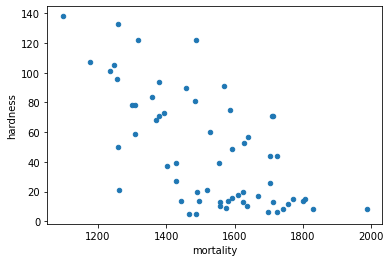

In [106]:
# точечный график
ax = df.plot(kind='scatter',
       y='hardness',
       x='mortality');

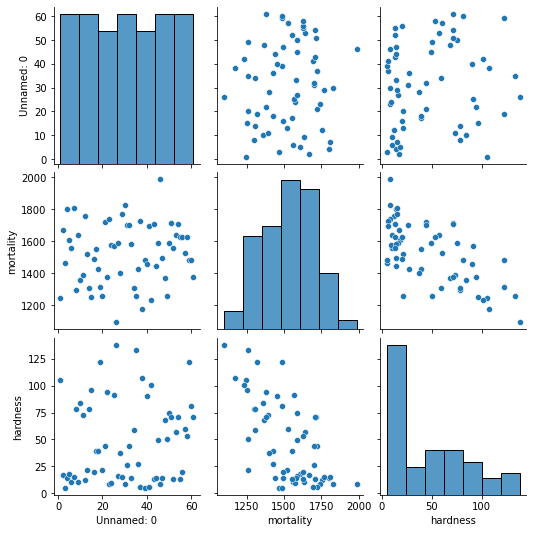

In [107]:
sns.pairplot(df)

In [108]:
#коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Коэффициент Пирсона от -0.5 до -0.7 говорит о возможном наличии заметной обратной связи. 
При увеличении жесткости воды уменьшается количество смертей.

In [109]:
#коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [110]:
df.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


<AxesSubplot:>

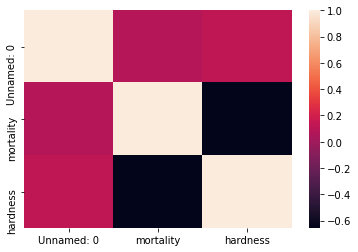

In [111]:
sns.heatmap(df.corr())

In [112]:
#регрессия

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [114]:
X = df[['mortality']]
y = df['hardness']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [116]:
X_train.shape

(42, 1)

In [117]:
y_train.shape

(42,)

In [118]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [119]:
model.coef_

array([-0.12670202])

In [120]:
model.intercept_

239.3678426140957

In [121]:
# получение прогнозов
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [122]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4948982822876836

49% весьма 

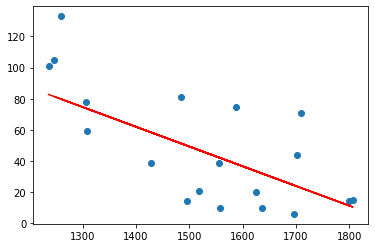

In [123]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

вывести график остатков

In [124]:
residuals = y_test - y_pred

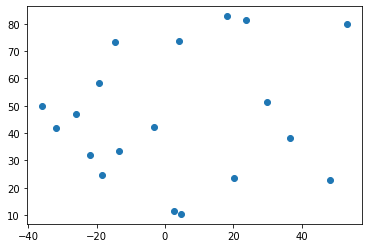

In [125]:
plt.scatter(residuals,y_pred)
plt.show()

In [126]:
df_north = df[df['location'] == 'North']
df_north.describe()

,Unnamed: 0,mortality,hardness
count,35.000000,35.000000,35.000000
mean,30.742857,1633.600000,30.400000
std,17.254740,136.936911,26.134494
min,2.000000,1378.000000,6.000000
25%,17.500000,1557.500000,12.500000
50%,30.000000,1637.000000,17.000000
75%,45.500000,1718.000000,44.000000
max,61.000000,1987.000000,94.000000


In [127]:
df_south = df[df['location'] == 'South']
df_south.describe()

,Unnamed: 0,mortality,hardness
count,26.000000,26.000000,26.000000
mean,31.346154,1376.807692,69.769231
std,18.742342,140.269175,40.360682
min,1.000000,1096.000000,5.000000
25%,14.250000,1259.250000,40.250000
50%,33.500000,1364.000000,75.500000
75%,46.500000,1485.750000,99.750000
max,60.000000,1627.000000,138.000000


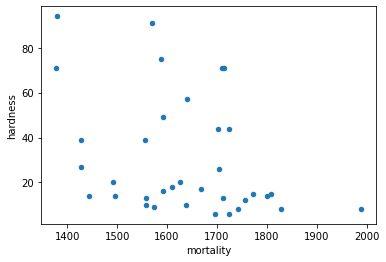

In [128]:
# точечный график
ax = df_north.plot(kind='scatter',
       y='hardness',
       x='mortality');

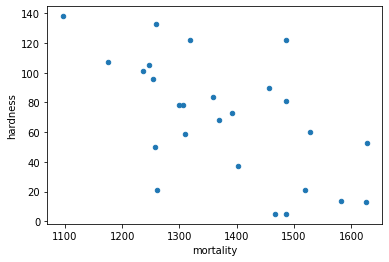

In [129]:
# точечный график
ax = df_south.plot(kind='scatter',
       y='hardness',
       x='mortality');

In [130]:
#коэффициент корреляции Пирсона
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


здесь корреляция уже умеренная

In [131]:
#коэффициент корреляции Пирсона
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


здесь все еще заметная, но уже меньше

In [132]:
#коэффициент корреляции Спирмена
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [133]:
#коэффициент корреляции Спирмена
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [134]:
X = df_north[['mortality']]
y = df_north['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
model.coef_
model.intercept_
y_pred = model.predict(X_test)
y_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [135]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-0.34863672627416675

 В общем случае коэффициент детерминации может быть и отрицательным, это говорит о крайней неадекватности модели: простое среднее приближает лучше.

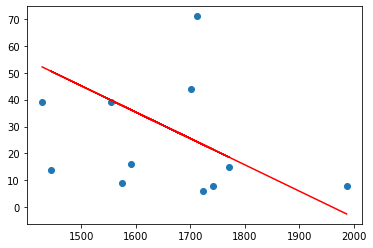

In [136]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

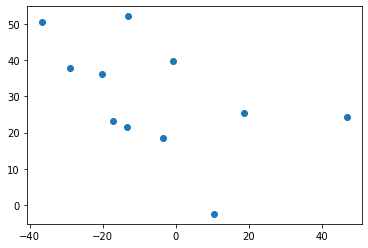

In [137]:
#график остатков
residuals = y_test - y_pred
plt.scatter(residuals,y_pred)
plt.show()

In [138]:
X = df_south[['mortality']]
y = df_south['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
model.coef_
model.intercept_
y_pred = model.predict(X_test)
y_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [139]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-0.052266157944838465

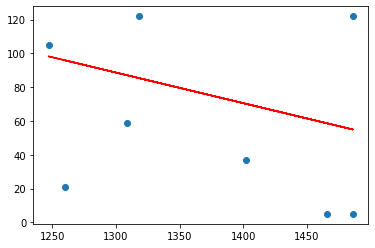

In [140]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

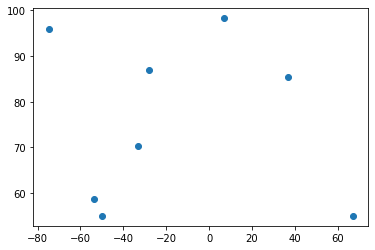

In [141]:
#график остатков
residuals = y_test - y_pred
plt.scatter(residuals,y_pred)
plt.show()